In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

Create $n\times 2$-dimensional array $X$  by sampling from $2$-dimensional Gaussian distribution with zero mean and covariance matrix $\Sigma$: $N(0,\Sigma)$. 

Label the examples $X_i\in\mathbb R^2$ as follows: if $\|X_i\|_2>1$, then $y_i=1$ with probability $q$ and $y_i=0$ with probabilty $1-q$. Otherwise, $y_i=0$ with probability $q$ and $y_i=1$ with probabilty $1-q$.

(Take, e.g., $n=1000$, $q=0.9$)

Hint: use `np.random.multivariate_normal`, `np.random.choice`, `np.linalg.norm`.

In [77]:
mean=[0,0]
cov=[[1,0],[0,1]]
n=1000
q=0.9

#creating nx2 dim array x 
X = np.random.multivariate_normal(mean,cov,n)

#creating the norms of X
norms = np.linalg.norm(X,axis = 1)

# Let's use np.random choice for labeling the examples
y = (norms>1)*np.random.choice([1, 0],size = n, p = [0.9, 0.1]) + (norms<=1)*np.random.choice([1, 0],size = n, p = [0.1, 0.9])
print('X = ',X)
print('')
print('y = ',y)

X =  [[-0.56799352  0.16834771]
 [-0.76549726 -1.94200191]
 [ 0.73456811  0.47632393]
 ...
 [ 2.24504217  1.01067493]
 [ 0.08552135 -0.70630364]
 [ 0.78096233 -0.68635722]]

y =  [0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1
 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1
 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1
 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1
 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1
 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 

array([[-0.41675785, -0.05626683],
       [-2.1361961 ,  1.64027081],
       [-1.79343559, -0.84174737],
       ...,
       [ 0.86196115,  0.22402915],
       [ 0.0106053 ,  0.86851322],
       [-0.12185276,  0.75622156]])

Make the scatter plot for the components of $X$. Select different markers for the labels $0$ and $1$.

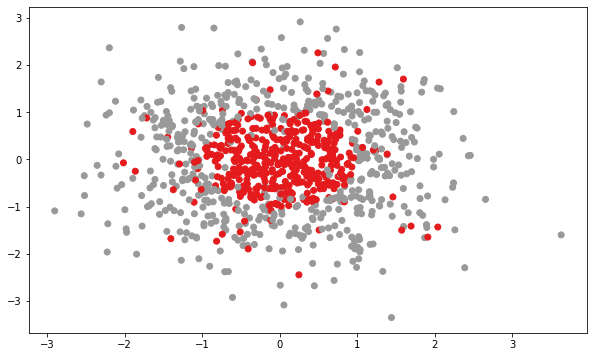

In [78]:
# CODE HERE
fig,ax = plt.subplots(figsize=(10, 6))
ax.scatter(X[:,0],X[:,1], c = y, cmap = 'Set1')


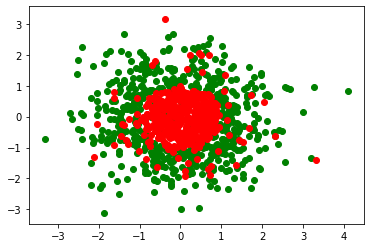

What is the proportion of examples, belonging to the positive class?

In [79]:
# CODE HERE
sum(y==1)/n

0.569

0.581

Make a train-test split, using `train_test_split` with `random_state=1`. 

In [80]:
# CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

Define the lists `training_accuracy`, `test_accuracy` (you can use arrays instead).

For the number of neighbors in $\{1,\dots,\max_n\}$ (e.g., $\max_n=200$)

1. Train the KNeighborsClassifier on the training set by using the `fit` method.
2. Make prediction for the training and validation sets and append the scores (accuracies) to the lists `training_accuracy`, `test_accuracy`.
3. Print the first 10 entries of these lists.

In [90]:
neighbors_num = range(1, 200)
training_accuracy = []
test_accuracy = []

for i in neighbors_num:
    clf = KNeighborsClassifier(n_neighbors = i)  # the KNeighborsClassifier
    mdl = clf.fit(X_train, y_train) # training the KNeighborsClassifier on the training set
    training_accuracy.append(mdl.score(X_train, y_train)) 
    test_accuracy.append(mdl.score(X_test, y_test))

print(training_accuracy[:10])
print(test_accuracy[:10])

[1.0, 0.9066666666666666, 0.924, 0.904, 0.912, 0.908, 0.9066666666666666, 0.9026666666666666, 0.904, 0.9]
[0.84, 0.808, 0.852, 0.852, 0.852, 0.852, 0.852, 0.848, 0.86, 0.864]


training_accuracy:
 [1.0, 0.896, 0.9026666666666666, 0.888, 0.8853333333333333, 0.884, 0.8893333333333333, 0.88, 0.88, 0.876]
test_accuracy:
 [0.84, 0.836, 0.868, 0.852, 0.88, 0.88, 0.888, 0.896, 0.9, 0.888]


Plot the graphs of the training and test accuracies against the number of neighbors (use `.xlabel`, `.ylabel`, `legend`). Do you see underfitting and overfitting?

Text(0, 0.5, 'accuracy')

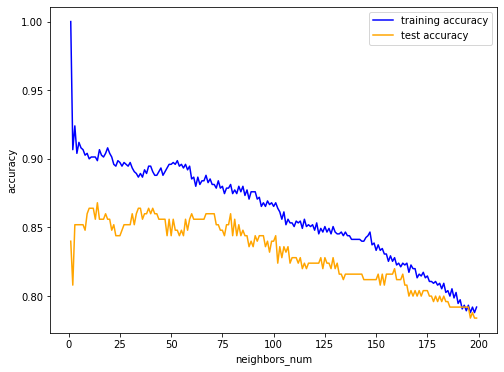

In [91]:
# CODE HERE
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(neighbors_num,training_accuracy, 'b')
ax.plot(neighbors_num,test_accuracy, 'orange')
ax.legend(['training accuracy','test accuracy'])
ax.set_xlabel('neighbors_num')
ax.set_ylabel('accuracy')

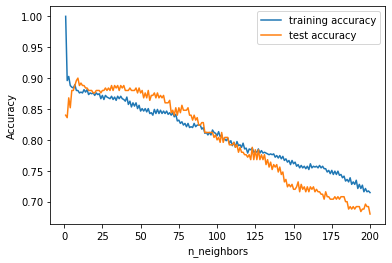

Print the maximal training and test accuracies.

In [83]:
# CODE HERE
print("maximal training accuracy ", np.max(training_accuracy))
print("maximal test accuracyy ", np.max(test_accuracy))

maximal training accuracy  1.0
maximal test accuracyy  0.868


maximal training accuracy 1.0 
maximal test accuracy 0.9


Find the best predictor and print its training and test scores (use `np.asarray(test_accuracy)` to convert list to array if needed). 

In [84]:
# CODE HERE
ind = np.argmax(test_accuracy)
print("best number of neighbors ", neighbors_num[ind])
print("training accuracy ", training_accuracy[ind])
print("test accuracy ", test_accuracy[ind])

best number of neighbors  14
training accuracy  0.8986666666666666
test accuracy  0.868


best number of neighbors 8 
training accuracy 0.88 
test accuracy 0.9


Plot the decision boundaries for the number of neighbors = 1, 3, 8, 200. The following code is due to Muller & Guido. However, you should import the module plots.plot_2d_separator from the module mglearn, created by Muller & Guido.

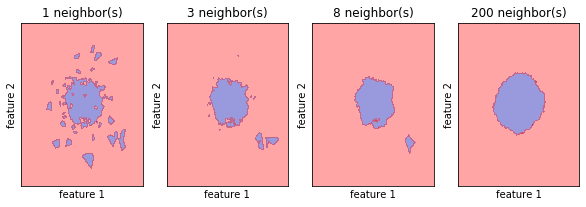

In [89]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 8, 200], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(clf, X_train, fill=True, ax=ax, alpha=.4)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')

In [25]:
# Recall, how the meshgrid works
a=np.array([0,1,2])
b=np.array([0,2,4,6])
za,zb=np.meshgrid(a,b)
print('array of the first coordinates of all points of the grid:\n',za)
print('array of the second coordinates o all points of the grid:\n',zb)
# some function
def f(x,y):
    return x+y
# computing the function on the grid
f(za,zb)

array of the first coordinates of all points of the grid:
 [[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]
array of the second coordinates o all points of the grid:
 [[0 0 0]
 [2 2 2]
 [4 4 4]
 [6 6 6]]


array([[0, 1, 2],
       [2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

Using meshgrid and pcolormesh make plot the decision boundaries by yourself. Similar examples can be found in the `scikit-learn` documentation.

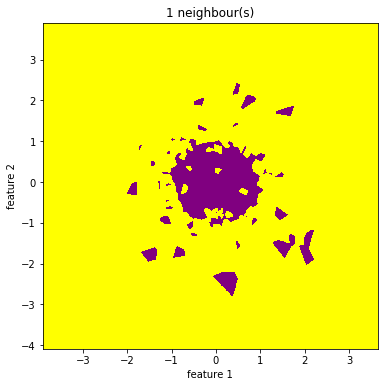

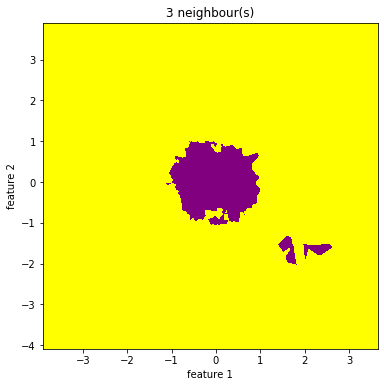

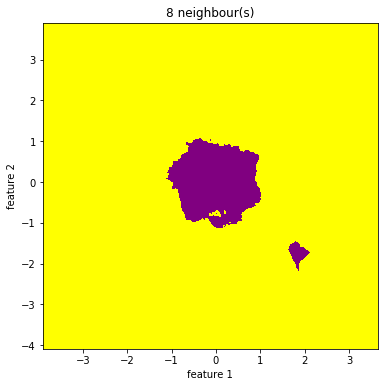

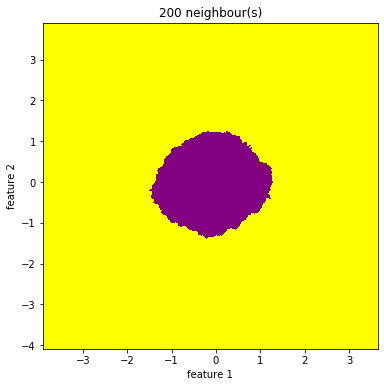

In [92]:
#CODE HERE

h = 0.01  # step of the mesh

# map of the colors
cmap_light = ListedColormap(["purple", "yellow"])

for n_neighbors in [1, 3, 8, 200]:
# we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # Ploting the decision boundary
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    plt.title("%i neighbour(s)" % (n_neighbors))

    # Plot also the training points
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.xlabel("feature 1")
    plt.ylabel("feature 2")

plt.show()

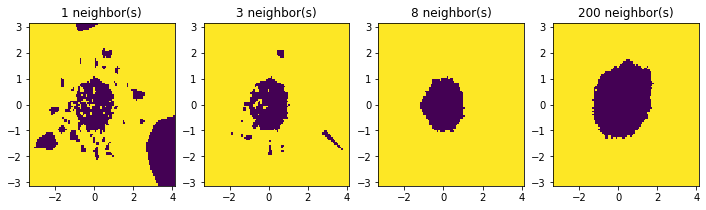

## Part 2.

Select the best number of neighbors by cross validation.

1. Import `GrigSearch` from `sklearn.model_selection`
2. Print possible hyperparameters for `KNeighborsClassifier()` by the method `.get_params().keys())`
3. Perform `GridSearchCV` with `cv=10` folds for the number of neighbors in $\{1,\dots,50\}$.
4. Print the best number of neighbors, and the scores of the respected KNN classifier.

In [94]:
#CODE HERE
clf = KNeighborsClassifier()
clf.get_params().keys()
parameters = {
    'n_neighbors': [i for i in range(1,51)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'n_jobs': [-1] 
}
gridsearch = GridSearchCV(clf, parameters, cv = 10)
gridsearch.fit(X_train, y_train)
gridsearch.best_score_



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')
0.9013333333333333
0.856


In [95]:
print(gridsearch.best_estimator_)
print(gridsearch.score(X_train,y_train))
print(gridsearch.score(X_test,y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')
0.9013333333333333
0.856


dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
{'n_neighbors': 13}
train score: 0.8813333333333333
test score: 0.888


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


For more information on the next exersize see *Albon 11.11*. 

Evaluate the effect of the number of observations in the training set on the learning process, using `learning_curve` from the module `sklearn.model_selection`. For 20 neighbors call it with `train_sizes=np.linspace(0.1, 1.0, 100)`
and fill the arrays `train_sizes`, `train_scores`, `validation_scores`.

In [30]:
from sklearn.model_selection import learning_curve

In [96]:
#CODE HERE
train_sizes, train_scores, validation_scores = learning_curve(
estimator = KNeighborsClassifier(n_neighbors = 20),
X = X_train,
y = y_train, 
train_sizes = np.linspace(0.1, 1.0, 100), 
cv = 10,
scoring = 'neg_mean_squared_error')

In [97]:
print(train_sizes)
print()
print(train_scores)
print()
print(validation_scores)

[ 67  73  79  85  92  98 104 110 116 122 128 135 141 147 153 159 165 171
 177 184 190 196 202 208 214 220 227 233 239 245 251 257 263 270 276 282
 288 294 300 306 312 319 325 331 337 343 349 355 362 368 374 380 386 392
 398 405 411 417 423 429 435 441 447 454 460 466 472 478 484 490 497 503
 509 515 521 527 533 540 546 552 558 564 570 576 582 589 595 601 607 613
 619 625 632 638 644 650 656 662 668 675]

[[-0.29850746 -0.26865672 -0.26865672 -0.26865672 -0.26865672 -0.26865672
  -0.26865672 -0.26865672 -0.26865672 -0.26865672]
 [-0.2739726  -0.30136986 -0.30136986 -0.30136986 -0.30136986 -0.30136986
  -0.30136986 -0.30136986 -0.30136986 -0.30136986]
 [-0.18987342 -0.2278481  -0.26582278 -0.26582278 -0.26582278 -0.26582278
  -0.26582278 -0.26582278 -0.26582278 -0.26582278]
 [-0.18823529 -0.24705882 -0.28235294 -0.28235294 -0.28235294 -0.28235294
  -0.28235294 -0.28235294 -0.28235294 -0.28235294]
 [-0.17391304 -0.26086957 -0.2826087  -0.2826087  -0.2826087  -0.2826087
  -0.2826087  -0.28

Number of scores in each row of `train_scores`, `validation_scores` coincides with the number of folds in cross validation. So form the arrays of means `train_mean`, `validation_mean`.

In [98]:
#CODE HERE
train_mean = np.mean(train_scores,axis=1)
validation_mean = np.mean(validation_scores,axis=1)
print(train_sizes.shape,train_scores.shape,validation_scores.shape)
print(train_mean.shape, validation_mean.shape)


(100,) (100, 10) (100, 10)
(100,) (100,)


In [33]:
print(train_sizes.shape,train_scores.shape,validation_scores.shape)

(100,) (100, 10) (100, 10)


Plot `train_mean`, `validation_mean` against `train_sizes`. 

Text(0, 0.5, 'score')

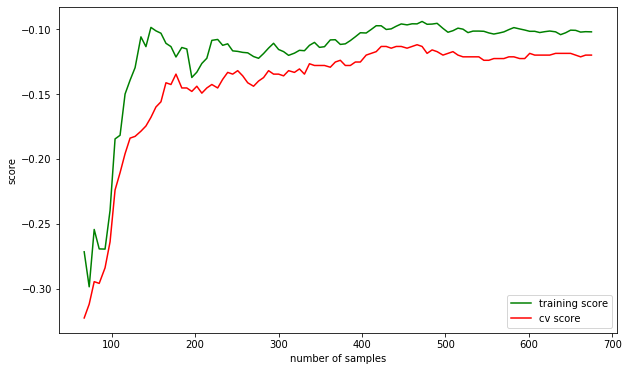

In [99]:
#CODE HERE
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(train_sizes,train_mean, 'g')
ax.plot(train_sizes,validation_mean, 'r')
ax.legend(['training score','cv score'])
ax.set_xlabel('number of samples')
ax.set_ylabel('score')

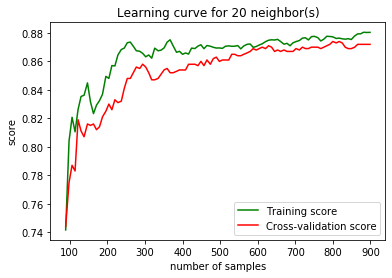

Tune the parameters of the SVC, using GridSearchfor for 10 folds and

`hyperparameters = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],  'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}`

Print the best parameter values and the scores of the respected SVC classifier.

In [100]:
#CODE HERE
from sklearn.svm import SVC

clf = SVC()
parameters = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],  
    'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]
}
gs = GridSearchCV(clf, parameters, cv = 10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [101]:
print(clf.get_params().keys())
print("Best parameters: ", gs.best_params_)
print("train score: ", gs.score(X_train,y_train))
print("test score:", gs.score(X_test,y_test))

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
Best parameters:  {'C': 1, 'gamma': 1}
train score:  0.9053333333333333
test score: 0.884
